In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    z = 1/(1 + np.exp(-x))
    return z

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


K = len(np.unique(y_train)) # Classes
N_tr = x_train.shape[0]
N_te = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(N_tr,Din))
print("x_train: ", x_train.shape)
x_test = np.reshape(x_test,(N_te,Din))
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("y_train:", y_train.shape)
print("b1:", b1.shape)
batch_size = N_tr



x_train:  (50000, 3072)
w1: (3072, 10)
y_train: (50000, 10)
b1: (10,)


In [4]:
epochs = 300
lr = 0.1
lr_decay=0.0001
reg = []
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(epochs):
    indices = np.arange(N_tr)
    rng.shuffle(indices)
    # Forward pass
    h = np.matmul(x_train,w1)+np.transpose(b1)
    y_pred  = sigmoid(h)
    #print(y_pred[0])
    loss = (1/N_tr)*(np.sum(np.multiply(-y_train,np.log(y_pred)) - np.multiply(1-y_train,np.log(1-y_pred))))

    loss_history.append(loss)
    reg.append(t)

    #print(y_pred[0])
    print('epoch',t+1)
    print('loss',loss)

    # Backw propogation
    lr = lr * (1 / (1 + lr_decay * t))
    w1 = w1 - lr*(1/N_tr)*np.matmul(np.transpose(x_train),(y_pred-y_train))

    y_out = np.zeros_like(y_train)
    y_out[np.arange(len(y_train)), y_pred.argmax(1)] = 1
    
    comp = np.all(y_out==y_train,axis = 1)
    
    accuracy = np.sum(comp)/N_tr
    train_acc_history.append(accuracy)
    print('accuracy : ',accuracy*100)
    print('\n')
    


epoch 1
loss 6.931471212145773
accuracy :  9.905999999999999


epoch 2
loss 6.8585940665871945
accuracy :  24.396


epoch 3
loss 6.831105309437693
accuracy :  29.086000000000002


epoch 4
loss 6.815673692288743
accuracy :  30.174


epoch 5
loss 6.8048928681690395
accuracy :  31.330000000000002


epoch 6
loss 6.796652198025831
accuracy :  32.134


epoch 7
loss 6.790049731056994
accuracy :  32.852


epoch 8
loss 6.784596074227912
accuracy :  33.47


epoch 9
loss 6.779988103519752
accuracy :  34.006


epoch 10
loss 6.776023525904555
accuracy :  34.472


epoch 11
loss 6.772560833924384
accuracy :  34.836


epoch 12
loss 6.76949771299188
accuracy :  35.168


epoch 13
loss 6.766758307519715
accuracy :  35.455999999999996


epoch 14
loss 6.764285234599574
accuracy :  35.711999999999996


epoch 15
loss 6.762034344312364
accuracy :  35.97


epoch 16
loss 6.759971161365295
accuracy :  36.162


epoch 17
loss 6.758068402507527
accuracy :  36.321999999999996


epoch 18
loss 6.756304207068637
accura

Printing accuracies and displaying w as images

final loss :  6.707100832496932
final accuracy :  40.577999999999996


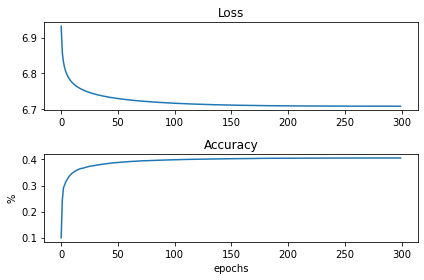

In [5]:
print('final loss : ',loss)
print('final accuracy : ',accuracy*100)

fig,ax = plt.subplots(2,1)
ax[0].plot(reg,loss_history)
ax[1].plot(reg,train_acc_history)
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('%')
fig.tight_layout()
plt.show()

Display weights as images

testing the accuracy

In [6]:
#Testing
h_testing = np.matmul(x_test,w1)+np.transpose(b1)
y_pred_test  = sigmoid(h_testing)
loss_test = (1/N_te)*(np.sum(np.multiply(-y_test,np.log(y_pred_test)) - np.multiply(1-y_test,np.log(1-y_pred_test))))
y_out_test = np.zeros_like(y_test)
y_out_test[np.arange(len(y_test)), y_pred_test.argmax(1)] = 1
    
comp_test = np.all(y_out_test==y_test,axis = 1)
    
accuracy = np.sum(comp_test)/N_te
print("Test data loss :",loss_test)
print("Test data accuracy :",accuracy*100)

Test data loss : 6.711215585234556
Test data accuracy : 39.57


## Task 2